In [2]:
import sys
import pickle
import pandas as pd
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

In [7]:
zeros = 0
nans = 0
for k, v in data_dict.iteritems():
    for a, b in v.iteritems():
        if b == 'NaN':
            nans += 1
        if b == 0:
            zeros += 1

print "zeros: {} nans: {}".format(zeros, nans)

146*21

zeros: 160 nans: 1358


3066

In [73]:
### Task 3: Create new feature(s)
for k,v in data_dict.items():
    if v['bonus'] != 'NaN' and v['bonus'] != 'NaN':
        data_dict[k]['bonus_to_salary_ratio'] = 1.0 * v['bonus'] / v['salary']
    else:
        data_dict[k]['bonus_to_salary_ratio'] = 'NaN' 

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
### Extract features and labels from dataset for local testing
features_list = ['poi'] + ['bonus_to_salary_ratio'] + financial_features + email_features
df = featureFormatDF(my_dataset, features_list, sort_keys = True)

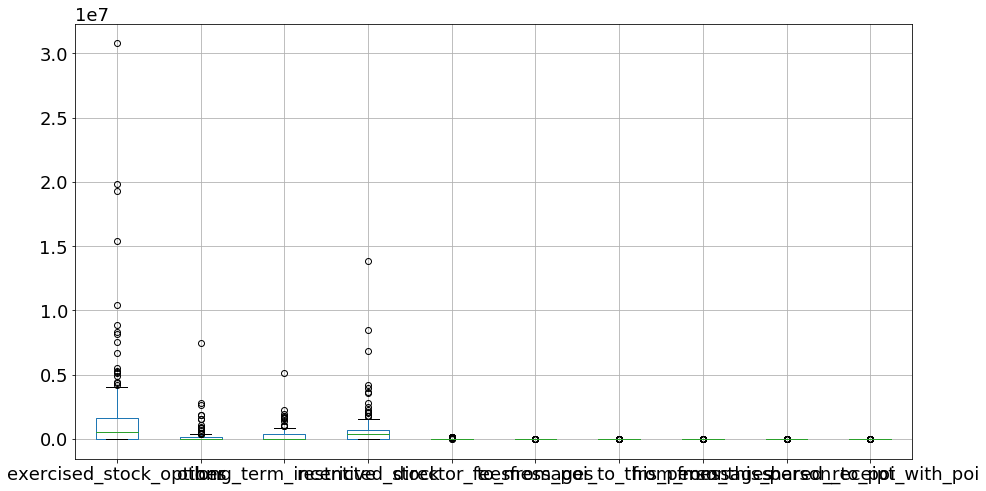

In [58]:
%matplotlib inline
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (15,8)

df.boxplot(features_list[11:])


In [75]:
df.shape

(145, 21)

In [4]:
df

,poi,bonus_to_salary_ratio,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,...,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
names,,,,,,,,,,,,,,,,,,,,,
ALLEN PHILLIP K,0.0,20.672922,201955.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,...,1729541.0,152.0,304805.0,126027.0,0.0,2902.0,47.0,2195.0,65.0,1407.0
BADUM JAMES P,0.0,0.000000,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,...,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BANNANTINE JAMES M,0.0,0.000000,477.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,...,4046157.0,864523.0,0.0,1757552.0,0.0,566.0,39.0,29.0,0.0,465.0
BAXTER JOHN C,0.0,4.492666,267102.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,...,6680544.0,2660303.0,1586055.0,3942714.0,0.0,0.0,0.0,0.0,0.0,0.0
BAY FRANKLIN R,0.0,1.668955,239671.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,...,0.0,69.0,0.0,145796.0,0.0,0.0,0.0,0.0,0.0,0.0
BAZELIDES PHILIP J,0.0,0.000000,80818.0,684694.0,860136.0,0.0,0.0,0.0,0.0,1599641.0,...,1599641.0,874.0,93750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BECK SALLY W,0.0,3.025980,231330.0,0.0,969068.0,0.0,700000.0,0.0,0.0,126027.0,...,0.0,566.0,0.0,126027.0,0.0,7315.0,144.0,4343.0,386.0,2639.0
BELDEN TIMOTHY N,1.0,24.532820,213999.0,2144013.0,5501630.0,0.0,5249999.0,0.0,-2334434.0,1110705.0,...,953136.0,210698.0,0.0,157569.0,0.0,7991.0,228.0,484.0,108.0,5521.0
BELFER ROBERT,0.0,0.000000,0.0,-102500.0,102500.0,0.0,0.0,44093.0,0.0,-44093.0,...,3285.0,0.0,0.0,0.0,3285.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe

import numpy as np
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.shape

(131, 21)

In [65]:
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.metrics import roc_curve, auc, confusion_matrix, fbeta_score, make_scorer

def run_logistic_regression_classifier(X_train, X_test, y_train, y_test, beta=1):
        
    X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
    X_train = X_resampled
    y_train = y_resampled
    
    print "{} ({:.2f}%) positive labels in training set with resampling".format(len(y_train[y_train == True]), 100.0*len(y_train[y_train == True])/len(y_train))
    print "{} ({:.2f}%) positive labels in test set".format(len(y_test[y_test == True]), 100.0*len(y_test[y_test == True])/len(y_test))
    
    t0 = time()
    param_grid = {
             'C': [1e1, 1e2, 1e3, 1e4, 1e5, 1e6],
              'penalty': ['l1', 'l2'],
              }
    f5_scorer = make_scorer(fbeta_score, beta=beta)
    clf = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
                       param_grid=param_grid,
                       scoring=f5_scorer)
    clf = clf.fit(X_train, y_train)
    print "training time: {}s".format(round(time() - t0, 3))
    print "Best estimator found by grid search:"
    print clf.best_estimator_
    
    y_pred = clf.predict(X_test)
    print "{} ({:.2f}%) positive labels in predictions".format(len(y_pred[y_pred == True]), 100.0*len(y_pred[y_pred == True])/len(y_pred))

    conf = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print conf
    TN, FP, FN, TP = conf.ravel()
    print "TN: {}, FP: {}, FN: {}, TP: {}".format(TN, FP, FN, TP)

    # accuracy: what proportion was correctly predicted out of total population?
    print "accuracy: {}".format((TP+TN)*1.0/(TN+FP+FN+TP))
    # precision: of all the ones you predicted to be of class X, what ratio was correct?
    print "precision: {}".format(TP*1.0/(TP+FP))
    # recall: of all the ones that ARE of class X, what ratio did you successfully predict?
    print "recall: {}".format(TP*1.0/(TP+FN))
    
    return clf.best_estimator_


def plot_roc(clf, X_test, y_test, X_train=None, y_train=None):
    y_score = clf.decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc)
    
    if X_train is not None and y_train is not None:
        y_score_train = clf.decision_function(X_train)
        
        # Compute ROC curve and ROC area for each class
        fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
        roc_auc_train = auc(fpr, tpr)

        plt.plot(fpr_train, tpr_train, color='aqua',
                 lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Logistic Regression Model')
    plt.legend(loc="lower right")
    plt.show() 

Logistic Regression: SMOTE resampling
81 (50.00%) positive labels in training set with resampling
5 (12.50%) positive labels in test set
training time: 0.555s
Best estimator found by grid search:
LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
9 (22.50%) positive labels in predictions
[[31  4]
 [ 0  5]]
TN: 31, FP: 4, FN: 0, TP: 5
accuracy: 0.9
precision: 0.555555555556
recall: 1.0


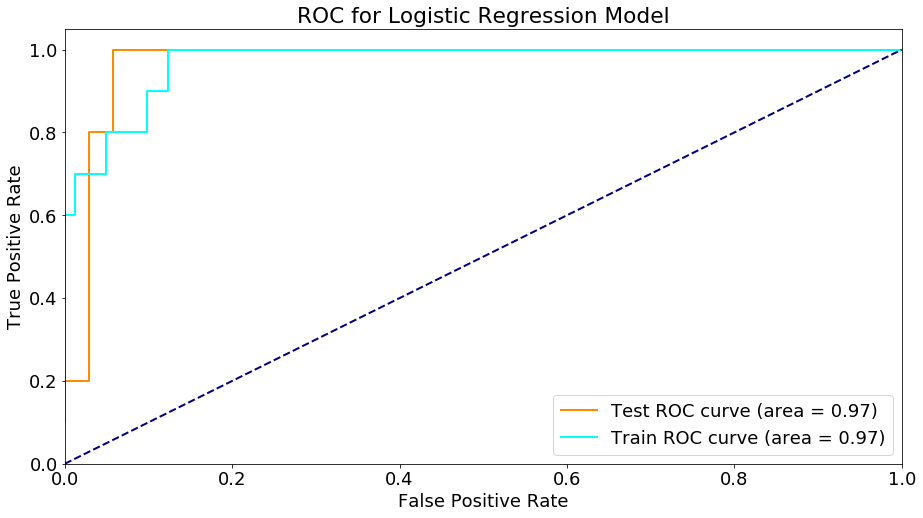

In [66]:
# SMOTE resampling
X = df[features_list[1:]]
y = df[features_list[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print "Logistic Regression: SMOTE resampling"
clf = run_logistic_regression_classifier(X_train, X_test, y_train, y_test)
plot_roc(clf, X_test, y_test, X_train, y_train)

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(n_splits = folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv.split(features, labels):
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )

        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."


my_dict = df.to_dict(orient="index")      
test_classifier(clf, my_dict, features_list)

LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
	Accuracy: 0.82386	Precision: 0.41773	Recall: 0.59150	F1: 0.48965	F2: 0.54607
	Total predictions: 14000	True positives: 1183	False positives: 1649	False negatives:  817	True negatives: 10351



In [68]:
# https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model
# Those values, however, will show that the second parameter
# is more influential
feature_weights = (df[features_list[1:]].std().as_matrix() * clf.coef_)[0]
for idx, value in enumerate(feature_weights):
    if abs(value) > 10:
        print "Feature[{}] {}: {:.2f}".format(idx, features_list[idx], value)

Feature[6] bonus: 40.53
Feature[14] restricted_stock: -204.38
Feature[17] from_poi_to_this_person: -14.45


In [53]:
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer

def run_decision_tree_classifier(X_train, X_test, y_train, y_test, beta=5):
    print "{} ({:.2f}%) positive labels in training set".format(len(y_train[y_train == True]), 100.0*len(y_train[y_train == True])/len(y_train))
    print "{} ({:.2f}%) positive labels in test set".format(len(y_test[y_test == True]), 100.0*len(y_test[y_test == True])/len(y_test))

    t0 = time()
    param_grid = {
             'min_samples_split': [2,5,10,15,20],
             'max_depth': range(1,5,1),
              }
    f5_scorer = make_scorer(fbeta_score, beta=beta)
    clf = GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
                       param_grid=param_grid,
                       scoring=f5_scorer)
    clf = clf.fit(X_train, y_train)
    print "training time: {}s".format(round(time() - t0, 3))
    print "Best estimator found by grid search:"
    print clf.best_estimator_

    y_pred = clf.predict(X_test)
    print "{} ({:.2f}%) positive labels in predictions".format(len(y_pred[y_pred == True]), 100.0*len(y_pred[y_pred == True])/len(y_pred))

    conf = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print conf
    TN, FP, FN, TP = conf.ravel()
    print "TN: {}, FP: {}, FN: {}, TP: {}".format(TN, FP, FN, TP)

    # accuracy: what proportion was correctly predicted out of total population?
    print "accuracy: {}".format((TP+TN)*1.0/(TN+FP+FN+TP))
    # precision: of all the ones you predicted to be of class X, what ratio was correct?
    print "precision: {}".format(TP*1.0/(TP+FP))
    # recall: of all the ones that ARE of class X, what ratio did you successfully predict?
    print "recall: {}".format(TP*1.0/(TP+FN))
    
    return clf.best_estimator_

# SMOTE resampling
dt = run_decision_tree_classifier(X, y)
test_classifier(dt, my_dict, features_list)

81 (50.00%) positive labels in training set with resampling
5 (12.50%) positive labels in test set
training time: 0.24s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
9 (22.50%) positive labels in predictions
[[29  6]
 [ 2  3]]
TN: 29, FP: 6, FN: 2, TP: 3
accuracy: 0.8
precision: 0.333333333333
recall: 0.6
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='bes

In [54]:
dt.feature_importances_
11 13 17 19

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.08911187,  0.        ,  0.22613121,  0.        ,
        0.        ,  0.        ,  0.10618593,  0.        ,  0.57857099])